Mean of customer_lifetime_value_boxcox: -3.7951575541939e-15
Mean of income_boxcox: -3.292550274171341e-17
Std of customer_lifetime_value_boxcox: 0.999999999999997
Std of income_boxcox: 0.999999999999998
Skewness of customer_lifetime_value_boxcox: 0.0433917788432849
Skewness of income_boxcox: -0.11103268351896158
Mean of customer_lifetime_value_yeo: 4.192688856775909e-15
Mean of income_yeo: 1.5440710528653361e-16
Std of customer_lifetime_value_yeo: 1.000000000000001
Std of income_yeo: 1.0000000000000009
Skewness of customer_lifetime_value_yeo: 0.04341600860309783
Skewness of income_yeo: -0.11102838291637904


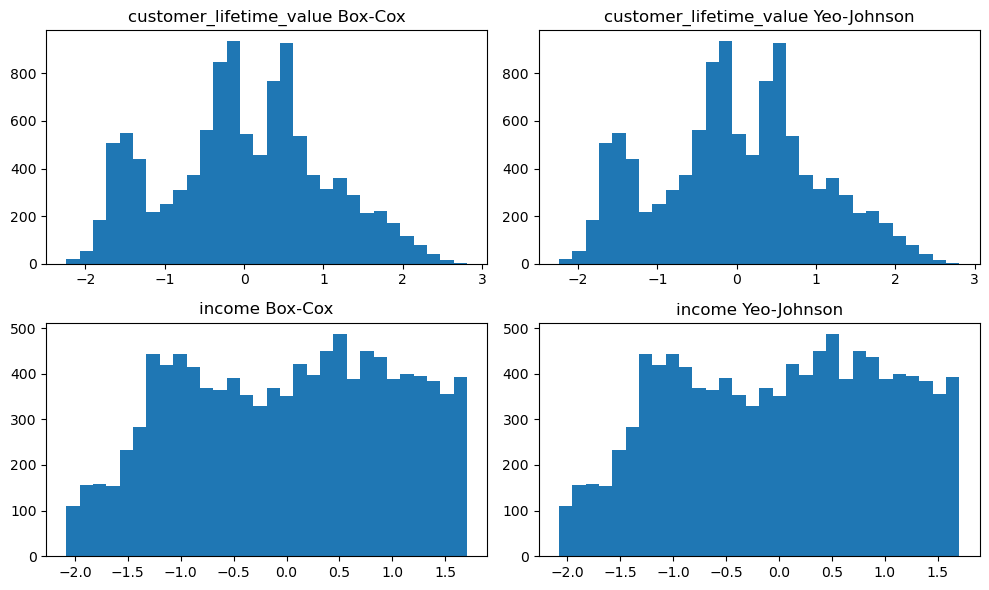

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PowerTransformer

# Load data
data = pd.read_csv('Data_Marketing_Customer_Analysis_Round3 copy.csv')

# Select a numerical feature with a wide range of values
varA = 'customer_lifetime_value'
# Select a numerical feature with a noticeably large skew
varB = 'income'

# Box-Cox transformation
pt = PowerTransformer(method='box-cox')
data[varA+'_boxcox'] = pt.fit_transform(data[[varA]])
data[varB+'_boxcox'] = pt.fit_transform(data[[varB]])

# Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
data[varA+'_yeo'] = pt.fit_transform(data[[varA]])
data[varB+'_yeo'] = pt.fit_transform(data[[varB]])

# Check mean, std, and skewness
print(f'Mean of {varA}_boxcox:', np.mean(data[varA+'_boxcox']))
print(f'Mean of {varB}_boxcox:', np.mean(data[varB+'_boxcox']))
print(f'Std of {varA}_boxcox:', np.std(data[varA+'_boxcox']))
print(f'Std of {varB}_boxcox:', np.std(data[varB+'_boxcox']))
print(f'Skewness of {varA}_boxcox:', stats.skew(data[varA+'_boxcox']))
print(f'Skewness of {varB}_boxcox:', stats.skew(data[varB+'_boxcox']))

print(f'Mean of {varA}_yeo:', np.mean(data[varA+'_yeo']))
print(f'Mean of {varB}_yeo:', np.mean(data[varB+'_yeo']))
print(f'Std of {varA}_yeo:', np.std(data[varA+'_yeo']))
print(f'Std of {varB}_yeo:', np.std(data[varB+'_yeo']))
print(f'Skewness of {varA}_yeo:', stats.skew(data[varA+'_yeo']))
print(f'Skewness of {varB}_yeo:', stats.skew(data[varB+'_yeo']))

# Plot PDF
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes[0, 0].hist(data[varA+'_boxcox'], bins=30)
axes[0, 0].set_title(f'{varA} Box-Cox')
axes[0, 1].hist(data[varA+'_yeo'], bins=30)
axes[0, 1].set_title(f'{varA} Yeo-Johnson')
axes[1, 0].hist(data[varB+'_boxcox'], bins=30)
axes[1, 0].set_title(f'{varB} Box-Cox')
axes[1, 1].hist(data[varB+'_yeo'], bins=30)
axes[1, 1].set_title(f'{varB} Yeo-Johnson')
plt.tight_layout()
plt.show()